# 선형 회귀(Linear Regression)
---
**선형 회귀**(Linear Regression): 하나 이상의 특성과 <U>연속적인 타깃 변수</U> 사이의 관계를 모델링함
- **단변량 선형 회귀**: 하나의 특성(설명 변수 $x$)과 연속적인 타깃(응답 변수 $y$) 사이의 관계를 모델링함<br>
$y = w_{0} + w_{1}x$<br>
여기서 $w_{0}$: y축 절편, $w_{1}$: 특성의 가중치
- **다변량 선형 회귀**: 여러 개의 특성이 있는 경우(일반화)<br>
$y = w_{0}x_{0} + w_{1}x_{1}+...+w_{m}x_{m}$<br>
여기서 $w_{0}$: y축 절편, $x_{0}=1$

# 지도 학습(회귀) 실습
---
**데이터셋**: 가상 데이터

**선형 회귀**(Linear Regression)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비
- `np.random.normal(평균, 표준편차, 개수)`

In [ ]:
num = 51

X = np.linspace(0, 10, num)
y = X + np.random.normal(1, 2, num)

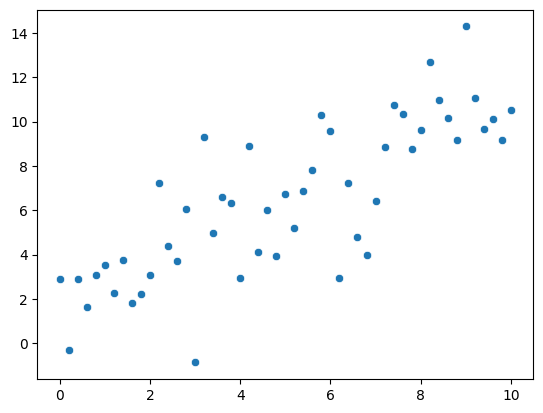

In [ ]:
sns.scatterplot(x=X, y=y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40,) (11,)
(40,) (11,)


In [ ]:
# 1차원 데이터
X_train[:10]

array([4.2, 8.8, 9.2, 3.6, 4. , 2. , 1.4, 2.8, 3.4, 4.4])

In [ ]:
# 2차원 데이터
X_train = X_train.reshape(-1, 1)

In [ ]:
X_train[:10]

array([[4.2],
       [8.8],
       [9.2],
       [3.6],
       [4. ],
       [2. ],
       [1.4],
       [2.8],
       [3.4],
       [4.4]])

In [ ]:
X_train.shape

(40, 1)

### 학습

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 기울기, 절편
lr.coef_, lr.intercept_

(array([0.88844124]), 2.0127729801165994)

In [ ]:
y_pred = lr.predict(X_train)
y_pred[:5]

array([ 5.74422619,  9.8310559 , 10.1864324 ,  5.21116145,  5.56653794])

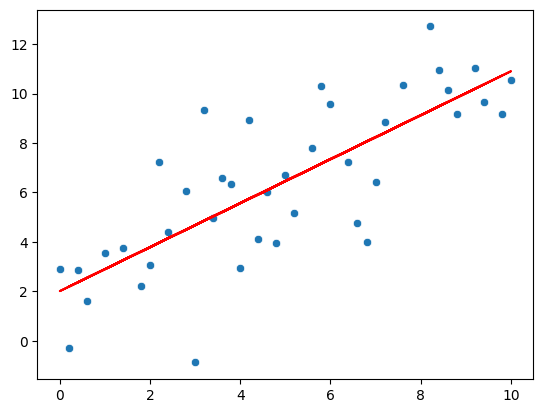

In [ ]:
sns.scatterplot(x=X_train.reshape(-1), y=y_train)
plt.plot(X_train.reshape(-1), y_pred, 'r')
plt.show()

### 평가
- MSE(Mean Squared Error, 평균제곱오차)
- RMSE(Root Mean Squared Error, 평균 제곱근 오차)
- MAE(Mean Absolute Error, 평균절대오차)

In [ ]:
from sklearn.metrics import mean_squared_error
# MSE
mse = mean_squared_error(y_train, y_pred)
mse

4.2979697604323395

In [ ]:
# RMSE
rmse = np.sqrt(mse)
rmse

2.0731545433064897

In [ ]:
from sklearn.metrics import mean_absolute_error
# MAE
mae = mean_absolute_error(y_train, y_pred)
mae

1.612874859813403

### 예측

In [ ]:
y_pred = lr.predict(X_test.reshape(-1, 1))
y_pred

array([ 8.94261466,  6.81035568, 10.54180889,  9.12030291,  3.07890247,
       10.00874415,  4.32272021,  3.43427897,  8.58723816,  7.52110867,
        2.72352597])

- **성능 평가**(RMSE)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

2.094118233691442

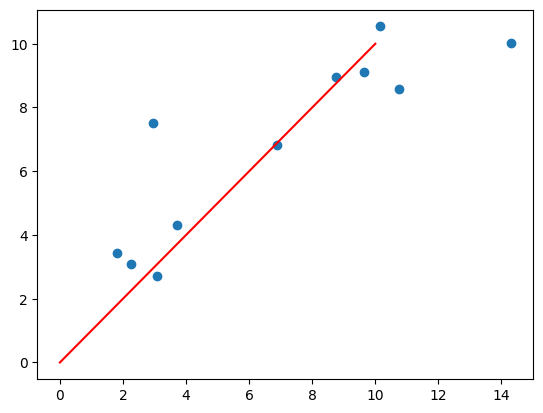

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([0, 10], [0, 10], 'r')
plt.show()